## Importing Required Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [2]:
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The column Id is not needed so lets drop it

In [3]:
iris=iris.drop('Id',axis=1)

In [6]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##  Visualization using seaborn


lets findout how many null values are there in the data

In [8]:
iris.isnull().count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

Luckily,this dataset is complete and doesn't have any null values

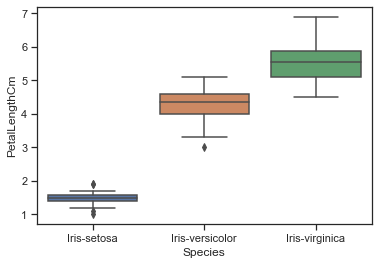

In [14]:
sns.set(style="ticks", color_codes=True)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)

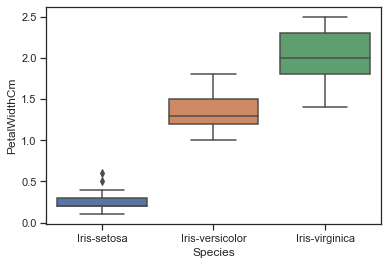

In [15]:
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)

Some observations from the above two graphs--
 - Virginica has the largest flower amongst all,followed by Versicolor,then Setosa come in the end.
 - Setosa is the only species to have __Outliers__ .

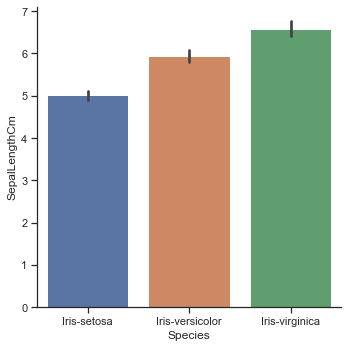

In [21]:
sns.catplot(x='Species',y='SepalLengthCm',data=iris ,kind='bar')

The __Sepal length__ also follows the same trend as petal length and petal width

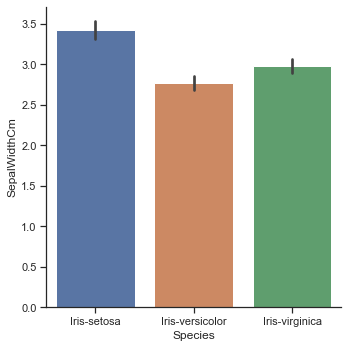

In [22]:
sns.catplot(x='Species',y='SepalWidthCm',data=iris ,kind='bar')

The sepal width however disrupts the trend by following the reverse trend(not exactly) but it manages to disrupt the continuity of trend 

Personally I prefer to use the boxplot instead of barplots,since it gives us an idea about outliers in the former case.

In [27]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Key Observations

- The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

- We will use all the features for training the algorithm and check the accuracy.

## Splitting the Data into Test and Train set

In [26]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [33]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25,random_state=3)

In [34]:
model = svm.SVC() #select the algorithm
model.fit(X_train,y_train) # we train the algorithm with the training data and the training output
prediction=model.predict(X_val) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_val))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9736842105263158


In [35]:
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_val)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(pred,y_val))

The accuracy of the Logistic Regression is 0.9736842105263158
